In [1]:
# iphython options
# delete variables in workspace
%reset -f
#places plots inline
%matplotlib inline
#automatically reloads modules if they are changed
%load_ext autoreload 
%autoreload 2

# Watershed Statistics

Adrian Wiegman | arhwiegman.github.io | adrian.wiegman@usda.gov

Created: 2023-04-05 (Edited: 2023-4-17)

----

## MEP Report Data

The objective of this notebook is to evaulate statistical relationships between watershed attributes and water quality monitoring data for the streams monitored by the [Massachusetts Estuaries Program (MEP) Reports ](https://www.mass.gov/guides/the-massachusetts-estuaries-project-and-reports). 

The MEP reports cover 109 watersheds and 96 stream monitoring locations within the MA southcoast, Cape Cod and the Islands of Martha's Vinyard and Nantucket. Each stream was monitored for at least one year. During monitoring, stage was records with a pressure tranducer, low tide stage discharge relationships were developed, and water samples were collected at least weekly and analyzed for NO3-N and TN. Stream monitoring occured between 1999 and 2007, with over half of monitoring occuring between 2003 and 2006. 

The MEP reports compared measured vs modeled discharge and N loads. Modeled discharge estimates based on watershed area and long term recharge rate. Nitrogen loads were modeled using assumptions about atmospheric deposition and attentuation rates for landcover classes, fertilizer use, the number of housing units, residential water use, wastewater treatment plants, and landfills. 

The table below describes the variables in the MEP report summary dataset [(`data/MEP_SummaryData_Coords.csv`)](data/MEP_SummaryData_Coords.csv).

variable | units | description
---|---|---
`Qmod` | m3/d | modeled discharge (cubic meters per day) using recharge rate and watershed area
`Qmeas` | m3/d | measured discharge based on low tide stage data and stage-discharge relationships
`Qdiff` | % | percent difference between Q measured and Q modeled  $100*(Q_{mod} - Q_{meas})/(Q_{meas})$
`NOx` | mg N/L | mean nitrate + nitrite concentration in samples collected stream water from over the monitoring period
`TN`  | mg N/L | mean total nitrogen concentration in samples collected stream water from over the monitoring period
`Atten` |  %   | estimated nitrogen attenuation based $100*(N_{mod} - N_{meas})/(N_{meas})$
`NOx2TN` | ratio | NOX divided by TN
`Yr_Start` | yyyy | year of monitoring start
`Yr_End` | yyyy | year of monitoring end
`Lat` | decimal degrees | lattitude WGS84 of monitoring location
`Lon` | decimal degrees | longitude WGS84 of monitoring location
`Region` | character | Region of MEP report 
`MEP` | character | name of MEP report on Mass.gov
`SiteName` | character | Name of stream monitoring site in MEP report
`Region_MEP` | character | unqiue id string: Region > MEP > SiteName

## MEP Watershed Attributes

The watershed boundaries for the MEP datasets for Martha's Vinyard and Cape Cod were obtained from the capecod commision and from Ed Eichner. Watershed attributes are summarized as percent cover for various landcover and soils datasets.within contributing areas to a given monitoring location. Watershed attributes concatenated from the datasource and class value (e.g. `HYDROLGRP_A` is % cover of Hydrologic Soil Group A within contributing subwatersheds). Watershed attributes are described in detail in the file: `Preprocess_Attributes.ipynb`. 

- numeric columns with no prefix summarize all portions of the contributing subwatersheds
- numeric columns with prefix `GT5` reflect land cover in areas above the 5th percentile elevation in contributing subwatersheds 
- numeric columns with prefix `LE5` summarize land cover in areas at or below the 5th percentile elevation in constributing subs. 

## Statistical Analysis

I will use machine learning methods available `scikit-learn 1.2.2` to predict the MEP variables (`NOX`, `TN`, `NOX2TN`, `Atten`, `Qmeas`, `Qdiff`) from watershed attributes. My hypotheses are as follows.

1. NOX will increase as (A) measures of human development increase, and (B) as natural areas capable of attenuating NOX decrease.
2. Atten will decrease with declining natural cover
3. NOX2TN will decrease with increasing natural cover

I will apply the following machine learning techniques and evaluate performance using [shuffle and split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) [k fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) with  [root mean squared error]() as the peformance metric:
1. multiple linear regression with regularization to prevent overfitting 
    
    A. [lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
    
    B. [elastic net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)
    
2. [random forest regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

3. [gradient boosting regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


# Bivariate with NOx
COVERNAME_developed open space exponential - positive
COVERNAME impervious - exponential positive
USE residential single family exponential - positive
USE right of way expoential - positive
USE tax exempt - negative inverse
USE ResComMix - positive
SLOPE_D inverse
GT5_Slope_D inverse
Depth to watertable 0 inverse negative
Farmland of unique importance inverse negative
Not prime farmland logistic/exponential positive
Nleaching high logistic/exponential positive
LE5_ hydrol group A negative 

## References

Gu, Q., Hu, H., Ma, L., Sheng, L., Yang, S., Zhang, X., Zhang, M., Zheng, K., & Chen, L. (2019). Characterizing the spatial variations of the relationship between land use and surface water quality using self-organizing map approach. Ecological Indicators, 102(March), 633–643. https://doi.org/10.1016/j.ecolind.2019.03.017

Lee, C. M., Choi, H., Kim, Y., Kim, M. S., Kim, H. K., & Hamm, S. Y. (2021). Characterizing land use effect on shallow groundwater contamination by using self-organizing map and buffer zone. Science of the Total Environment, 800(3), 149632. https://doi.org/10.1016/j.scitotenv.2021.149632

Feng, Z., Xu, C., Zuo, Y., Luo, X., Wang, L., Chen, H., Xie, X., Yan, D., & Liang, T. (2023). Analysis of water quality indexes and their relationships with vegetation using self-organizing map and geographically and temporally weighted regression. Environmental Research, 216(P2), 114587. https://doi.org/10.1016/j.envres.2022.114587


@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

In [2]:
# this codeblock sets up the environment from jupyter notebooks
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, os, glob, sys, errno
wdr = os.getcwd() 
print("working directory:",wdr)
idr = os.path.join(wdr,'data')
print("input directory:",idr)
odr = os.path.join(wdr,'outputs')
print("output directory:",odr)
scripts = os.path.join(wdr,'scripts')
print("source codes:",scripts)
sys.path.insert(0,scripts) # insert path to directory containing source codes
from functions import *
print("\ntype `fn`+tab to look up user defined functions, \nrun `??fn_{name}` to inspect function source code\n")
fn_hello('Adrian')
print("\nenvironment setup complete")

working directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\MEP
input directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\MEP\data
output directory: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\MEP\outputs
source codes: C:\Users\Adrian.Wiegman\Documents\GitHub\Wiegman_USDA_ARS\MEP\scripts

type `fn`+tab to look up user defined functions, 
run `??fn_{name}` to inspect function source code

hello Adrian

environment setup complete


In [3]:
# read the subwatershed attributes table
filename = "df_monitoring_point_sub_attributes_terminus.csv"
_ = pd.read_csv(os.path.join(idr,filename))
_ = _.rename(columns=lambda x: re.sub('\.0','',x))
_ = _.rename(columns=lambda x: re.sub('\s','_',x))
#_ = _[_.columns.drop(list(_.filter(regex='DEP2')))]
#_ = _[_.columns.drop(list(_.filter(regex='SLOPE_pct')))]
_.replace([np.inf, -np.inf], np.nan, inplace=True)
_.fillna(0,inplace=True)
print(_.info())
for c in _.columns:
    print(c)
display(_.head())
df_point_sub_atts = _
del _ # clear temporary object from memory

# read the subwatershed monitoring data table
filename = "MEP_SummaryData_Coords.csv"
_ = pd.read_csv(os.path.join(idr,filename))
_.info()

#print()
_ = _[~_['Region_MEP'].isna()]# remove rows with >50% Null
#print(_.shape)
_.dropna(axis=1, thresh = int(0.5*_.shape[0]), inplace=True) # remove columns with >50% Null
#print(_.info())
_.replace([np.inf, -np.inf], np.nan, inplace=True)
#_.fillna(0,inplace=True)
df_monitoring = _
del _ # clear temporary object from memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, FID to LE5_Use_Mix
dtypes: float64(590), int64(1), object(1)
memory usage: 462.6+ KB
None
FID
Region_MEP
Lat
Lon
Shape_Area
SLOPE_
SLOPE_0
SLOPE_A
SLOPE_B
SLOPE_C
SLOPE_D
SLOPE_E
FRMLNDCLS_
FRMLNDCLS_All_areas_are_prime_farmland
FRMLNDCLS_Farmland_of_statewide_importance
FRMLNDCLS_Farmland_of_unique_importance
FRMLNDCLS_Not_prime_farmland
HYDROLGRP_
HYDROLGRP_A
HYDROLGRP_A/D
HYDROLGRP_B
HYDROLGRP_B/D
HYDROLGRP_C
HYDROLGRP_C/D
HYDROLGRP_D
HYDRCRATNG_
HYDRCRATNG_No
HYDRCRATNG_Unranked
HYDRCRATNG_Yes
DRAINCLASS_
DRAINCLASS_Excessively_drained
DRAINCLASS_Moderately_well_drained
DRAINCLASS_Poorly_drained
DRAINCLASS_Somewhat_excessively_drained
DRAINCLASS_Somewhat_poorly_drained
DRAINCLASS_Subaqueous
DRAINCLASS_Very_poorly_drained
DRAINCLASS_Well_drained
DEP2WATTBL_0
DEP2WATTBL_5
DEP2WATTBL_8
DEP2WATTBL_10
DEP2WATTBL_15
DEP2WATTBL_23
DEP2WATTBL_29
DEP2WATTBL_30
DEP2WATTBL_38
DEP2WATTBL_45
DEP2WATTBL_

,FID,Region_MEP,Lat,Lon,Shape_Area,SLOPE_,SLOPE_0,SLOPE_A,SLOPE_B,SLOPE_C,...,LE5_CRANBERRY_0,LE5_CRANBERRY_1,LE5_ACTIVE_0,LE5_ACTIVE_1,LE5_HSG_D,LE5_HYDRIC,LE5_NaturalCover,LE5_Use_Res,LE5_Use_ResComMix,LE5_Use_Mix
0,1,Buzzards Bay > Acushnet > Acushnet River,41.681859,-70.918844,4.510600e+07,0.000000,7.346414,40.006569,41.155998,8.742853,...,97.505928,2.494072,97.505928,2.494072,53.576021,83.413571,93.312538,22.879596,34.147798,11.253295
1,2,Buzzards Bay > Acushnet > Acushnet River,41.681859,-70.918844,4.510600e+07,0.000000,7.346414,40.006569,41.155998,8.742853,...,97.505928,2.494072,97.505928,2.494072,53.576021,83.413571,93.312538,22.879596,34.147798,11.253295
2,3,Buzzards Bay > Acushnet > Acushnet River,41.681859,-70.918844,4.510600e+07,0.000000,7.346414,40.006569,41.155998,8.742853,...,97.505928,2.494072,97.505928,2.494072,53.576021,83.413571,93.312538,22.879596,34.147798,11.253295
3,4,Buzzards Bay > Acushnet > Acushnet River,41.681859,-70.918844,4.510600e+07,0.000000,7.346414,40.006569,41.155998,8.742853,...,97.505928,2.494072,97.505928,2.494072,53.576021,83.413571,93.312538,22.879596,34.147798,11.253295
4,5,Buzzards Bay > Westport > Adamsville Brook,41.553741,-71.126612,1.489267e+07,51.319207,0.620756,21.203183,25.675601,0.913079,...,100.000000,0.000000,100.000000,0.000000,1.712729,13.130529,13.727705,6.391487,16.517127,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idn          96 non-null     int64  
 1   Region_MEP   96 non-null     object 
 2   Region       96 non-null     object 
 3   MEP          96 non-null     object 
 4   SiteName     96 non-null     object 
 5   Lon          96 non-null     float64
 6   Lat          96 non-null     float64
 7   Yr_Start     96 non-null     int64  
 8   Yr_End       96 non-null     int64  
 9   Qmeas        96 non-null     float64
 10  Qmod         96 non-null     int64  
 11  Qdiff        96 non-null     float64
 12  NOx          96 non-null     float64
 13  TN           96 non-null     float64
 14  NOx2TN       96 non-null     float64
 15  L_NOx_meas   96 non-null     float64
 16  L_TN_meas    96 non-null     float64
 17  Atten        95 non-null     float64
 18  Notes        14 non-null     object 
 19  Unnamed: 1

In [4]:
# clean up the monitoring data.
#print(df_monitoring.replace(to_replace=r'//', value='', regex=True))
#df_monitoring.rename(columns={'Pond/Stream N Atten. Meas. (%)':'Atten (%)'},inplace=True)
#df_monitoring['Atten (%)'] = pd.to_numeric(df_monitoring['Atten (%)'])
#print(df_monitoring.info())

# add weights of observations based on year of monitoring
df_monitoring['n'] = 1
_ = df_monitoring[["Region_MEP","n"]].dropna().groupby('Region_MEP').aggregate(sum)
df_monitoring.merge(_,on="Region_MEP")
df_monitoring['wt'] = 1/df_monitoring['n']  # make observation wieghts based on monitoring years.
df_monitoring.head()
# select columns to retain for analysis
selected_monitoring_cols = ['NOx2TN','TN','Qmeas','Qdiff','NOx','Atten']
grps = ['Region_MEP']

# calculate mean value for all monitoring years at a given station
df_monitoring_avg = df_monitoring.groupby(grps)[selected_monitoring_cols].aggregate(np.mean)
df_monitoring_avg['Yr_Start'] = df_monitoring.groupby(grps)['Yr_Start'].aggregate(np.min)
df_monitoring_avg['Yr_End'] = df_monitoring.groupby(grps)['Yr_End'].aggregate(np.max)
df_monitoring_avg = df_monitoring_avg.assign(Year = (df_monitoring_avg.Yr_Start+df_monitoring_avg['Yr_End'])/2)
df_monitoring_avg.info()
df_monitoring_avg.to_csv(os.path.join(odr,"MEP_SummaryData_Coords_Avg.csv"))

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, Buzzards Bay > Acushnet > Acushnet River to Islands > Tisbury > Tiasquam River
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NOx2TN    94 non-null     float64
 1   TN        94 non-null     float64
 2   Qmeas     94 non-null     float64
 3   Qdiff     94 non-null     float64
 4   NOx       94 non-null     float64
 5   Atten     93 non-null     float64
 6   Yr_Start  94 non-null     int64  
 7   Yr_End    94 non-null     int64  
 8   Year      94 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 7.3+ KB


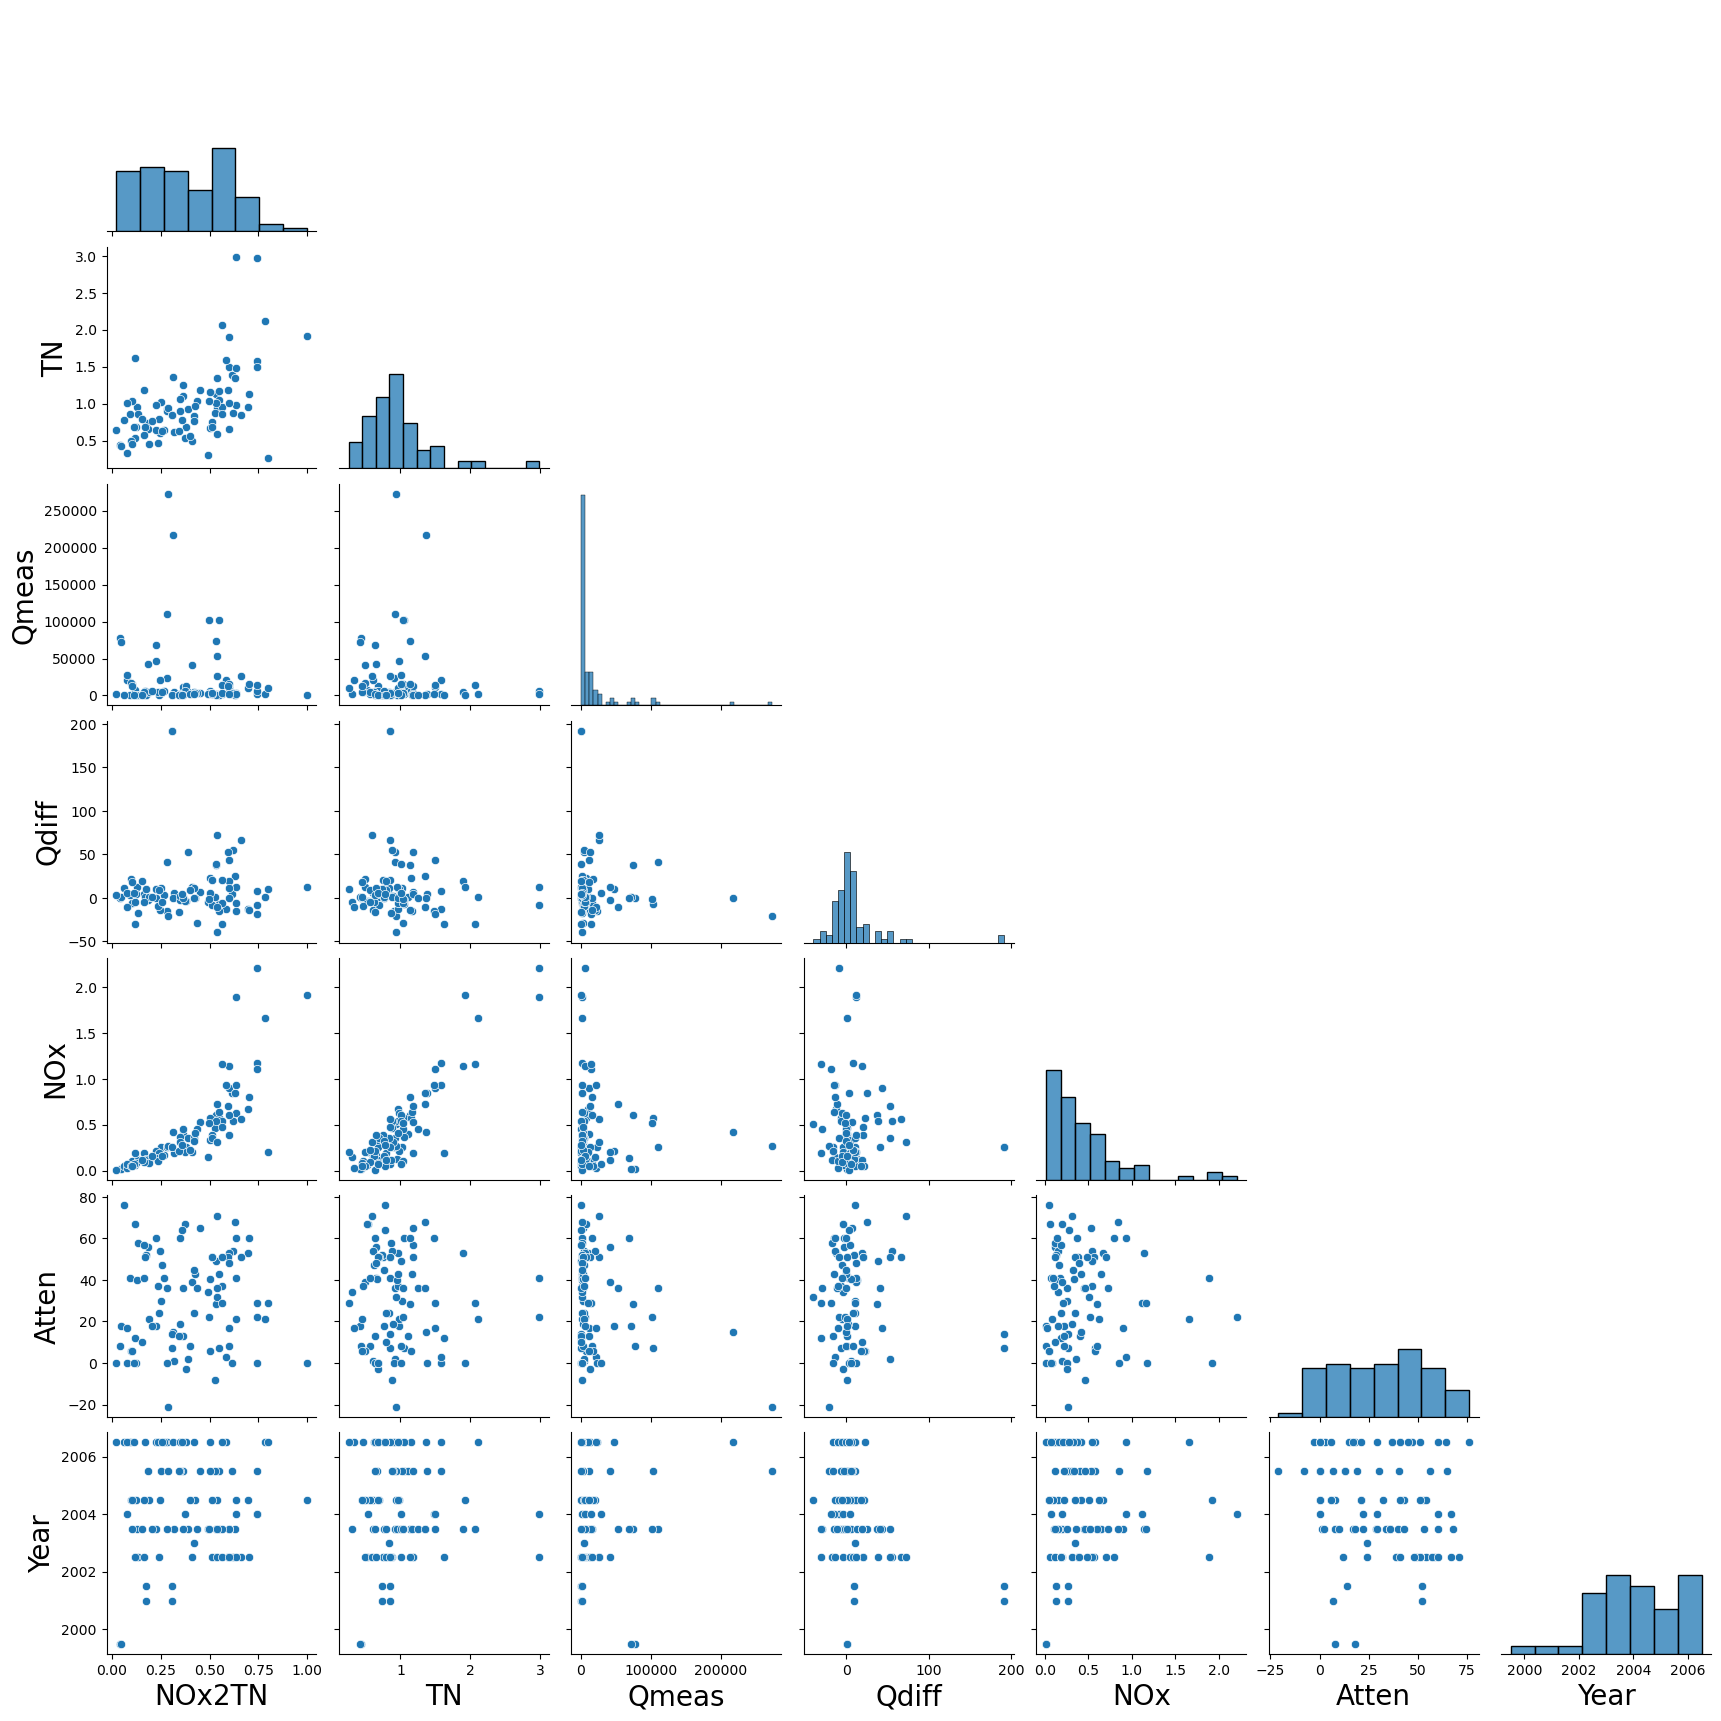

In [5]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df_monitoring_avg.drop(['Yr_Start','Yr_End'],axis=1),
             corner=True) # show only lower triangle

In [6]:
#join the data
df_monitoring_watershed = df_monitoring_avg.merge(df_point_sub_atts.drop('FID',axis=1),how='left',on="Region_MEP")
df = df_monitoring_watershed # make alias
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(0,inplace=True)
#df.set_index(['Region_MEP'],inplace=True)
df.info()
df.to_csv(os.path.join(odr,'df_MEP_Monitoring_Avg_Geo_Merge.csv'),index=False)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 97
Columns: 600 entries, Region_MEP to LE5_Use_Mix
dtypes: float64(597), int64(2), object(1)
memory usage: 450.8+ KB
Index(['Region_MEP', 'NOx2TN', 'TN', 'Qmeas', 'Qdiff', 'NOx', 'Atten',
       'Yr_Start', 'Yr_End', 'Year',
       ...
       'LE5_CRANBERRY_0', 'LE5_CRANBERRY_1', 'LE5_ACTIVE_0', 'LE5_ACTIVE_1',
       'LE5_HSG_D', 'LE5_HYDRIC', 'LE5_NaturalCover', 'LE5_Use_Res',
       'LE5_Use_ResComMix', 'LE5_Use_Mix'],
      dtype='object', length=600)


In [7]:
# univariate analysis
df_summary = df.describe().T
df_summary.to_csv(os.path.join(odr,'df_summary.csv'))
df_summary

,count,mean,std,min,25%,50%,75%,max
NOx2TN,96.0,0.395915,0.214602,0.020376,0.219531,0.392353,0.553718,1.000000
TN,96.0,0.974231,0.476575,0.258000,0.665250,0.885000,1.134333,2.988000
Qmeas,96.0,20385.938223,41396.579868,97.000000,1493.500000,4374.000000,16409.000000,272703.126000
Qdiff,96.0,10.434047,33.524744,-39.737533,-4.439386,3.735176,12.526732,191.676436
NOx,96.0,0.440131,0.421982,0.013000,0.149500,0.319000,0.604333,2.207000
...,...,...,...,...,...,...,...,...
LE5_HYDRIC,96.0,58.585501,29.789063,0.000000,32.258096,67.546106,83.413571,98.312921
LE5_NaturalCover,96.0,82.691009,24.700490,0.822193,82.056248,92.288382,98.527335,100.000000
LE5_Use_Res,96.0,25.397146,28.318825,0.000000,3.257009,13.596184,38.989275,99.949538
LE5_Use_ResComMix,96.0,29.136343,28.537345,0.000000,4.134123,18.488539,49.539676,99.949538


In [8]:
for i in df.index:
    print(i)
    print("index: ",i,"  MEP id: ",df.Region_MEP[i])

0
index:  0   MEP id:  Buzzards Bay > Acushnet > Acushnet River
1
index:  1   MEP id:  Buzzards Bay > Acushnet > Acushnet River
2
index:  2   MEP id:  Buzzards Bay > Acushnet > Acushnet River
3
index:  3   MEP id:  Buzzards Bay > Acushnet > Acushnet River
4
index:  4   MEP id:  Buzzards Bay > Acushnet > Acushnet River
6
index:  6   MEP id:  Buzzards Bay > Nasketucket > Nasketucket River 1
7
index:  7   MEP id:  Buzzards Bay > Nasketucket > Nasketucket River 2
8
index:  8   MEP id:  Buzzards Bay > Nasketucket > Nonquit Brook
9
index:  9   MEP id:  Buzzards Bay > Nasketucket > Shaws Cove Stream
10
index:  10   MEP id:  Buzzards Bay > Slocums > Barneys Joy Creek
11
index:  11   MEP id:  Buzzards Bay > Slocums > Destruction Brook
12
index:  12   MEP id:  Buzzards Bay > Slocums > Giles Creek
13
index:  13   MEP id:  Buzzards Bay > Slocums > Paskamansett River
14
index:  14   MEP id:  Buzzards Bay > Wareham > Agawam River
15
index:  15   MEP id:  Buzzards Bay > Wareham > Wankinco River
16
in

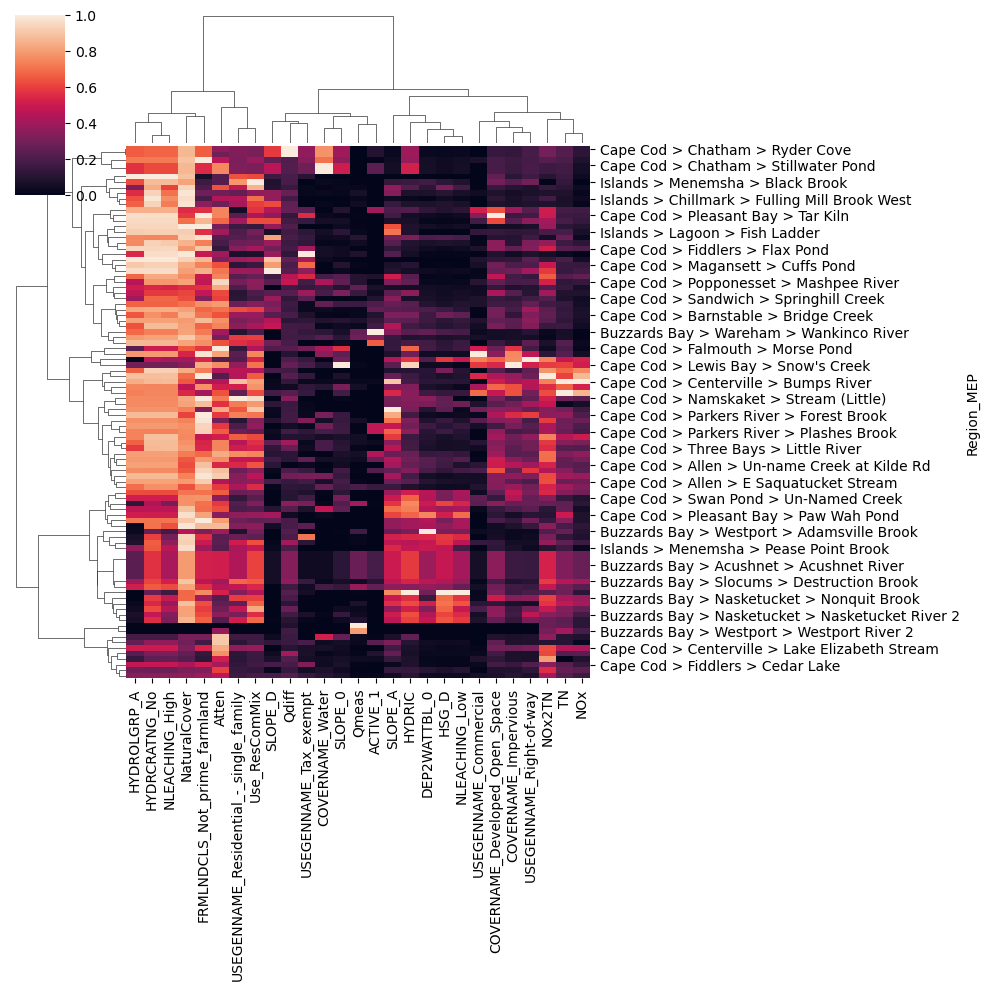

In [163]:
selected = ['HYDRCRATNG_No',
                     'COVERNAME_Water','HSG_D','HYDRIC',
                     'SLOPE_0','SLOPE_A',
                     'NaturalCover','USEGENNAME_Commercial',
                     'ACTIVE_1','NLEACHING_Low',
'COVERNAME_Developed_Open_Space', # positive
'COVERNAME_Impervious', # exponential positive
'USEGENNAME_Residential_-_single_family', # exponential - positive
'USEGENNAME_Right-of-way', # positive
'USEGENNAME_Tax_exempt', # negative inverse
'Use_ResComMix', # positive
'SLOPE_D', # inverse
'DEP2WATTBL_0', # inverse negative
'FRMLNDCLS_Not_prime_farmland', # logistic/exponential positive
'NLEACHING_High', # logistic/exponential positive
'HYDROLGRP_A', # negative 
           ]

selected_le5 = ["LE5_"+i for i in selected]
selected_gt5 = ["GT5_"+i for i in selected]

selected_watershed_features = selected
#selected_watershed_features = selected_le5 + selected_gt5

sns.clustermap(df[selected_monitoring_cols+selected_watershed_features].set_index(df['Region_MEP']),standard_scale=1,metric="euclidean",method='ward')

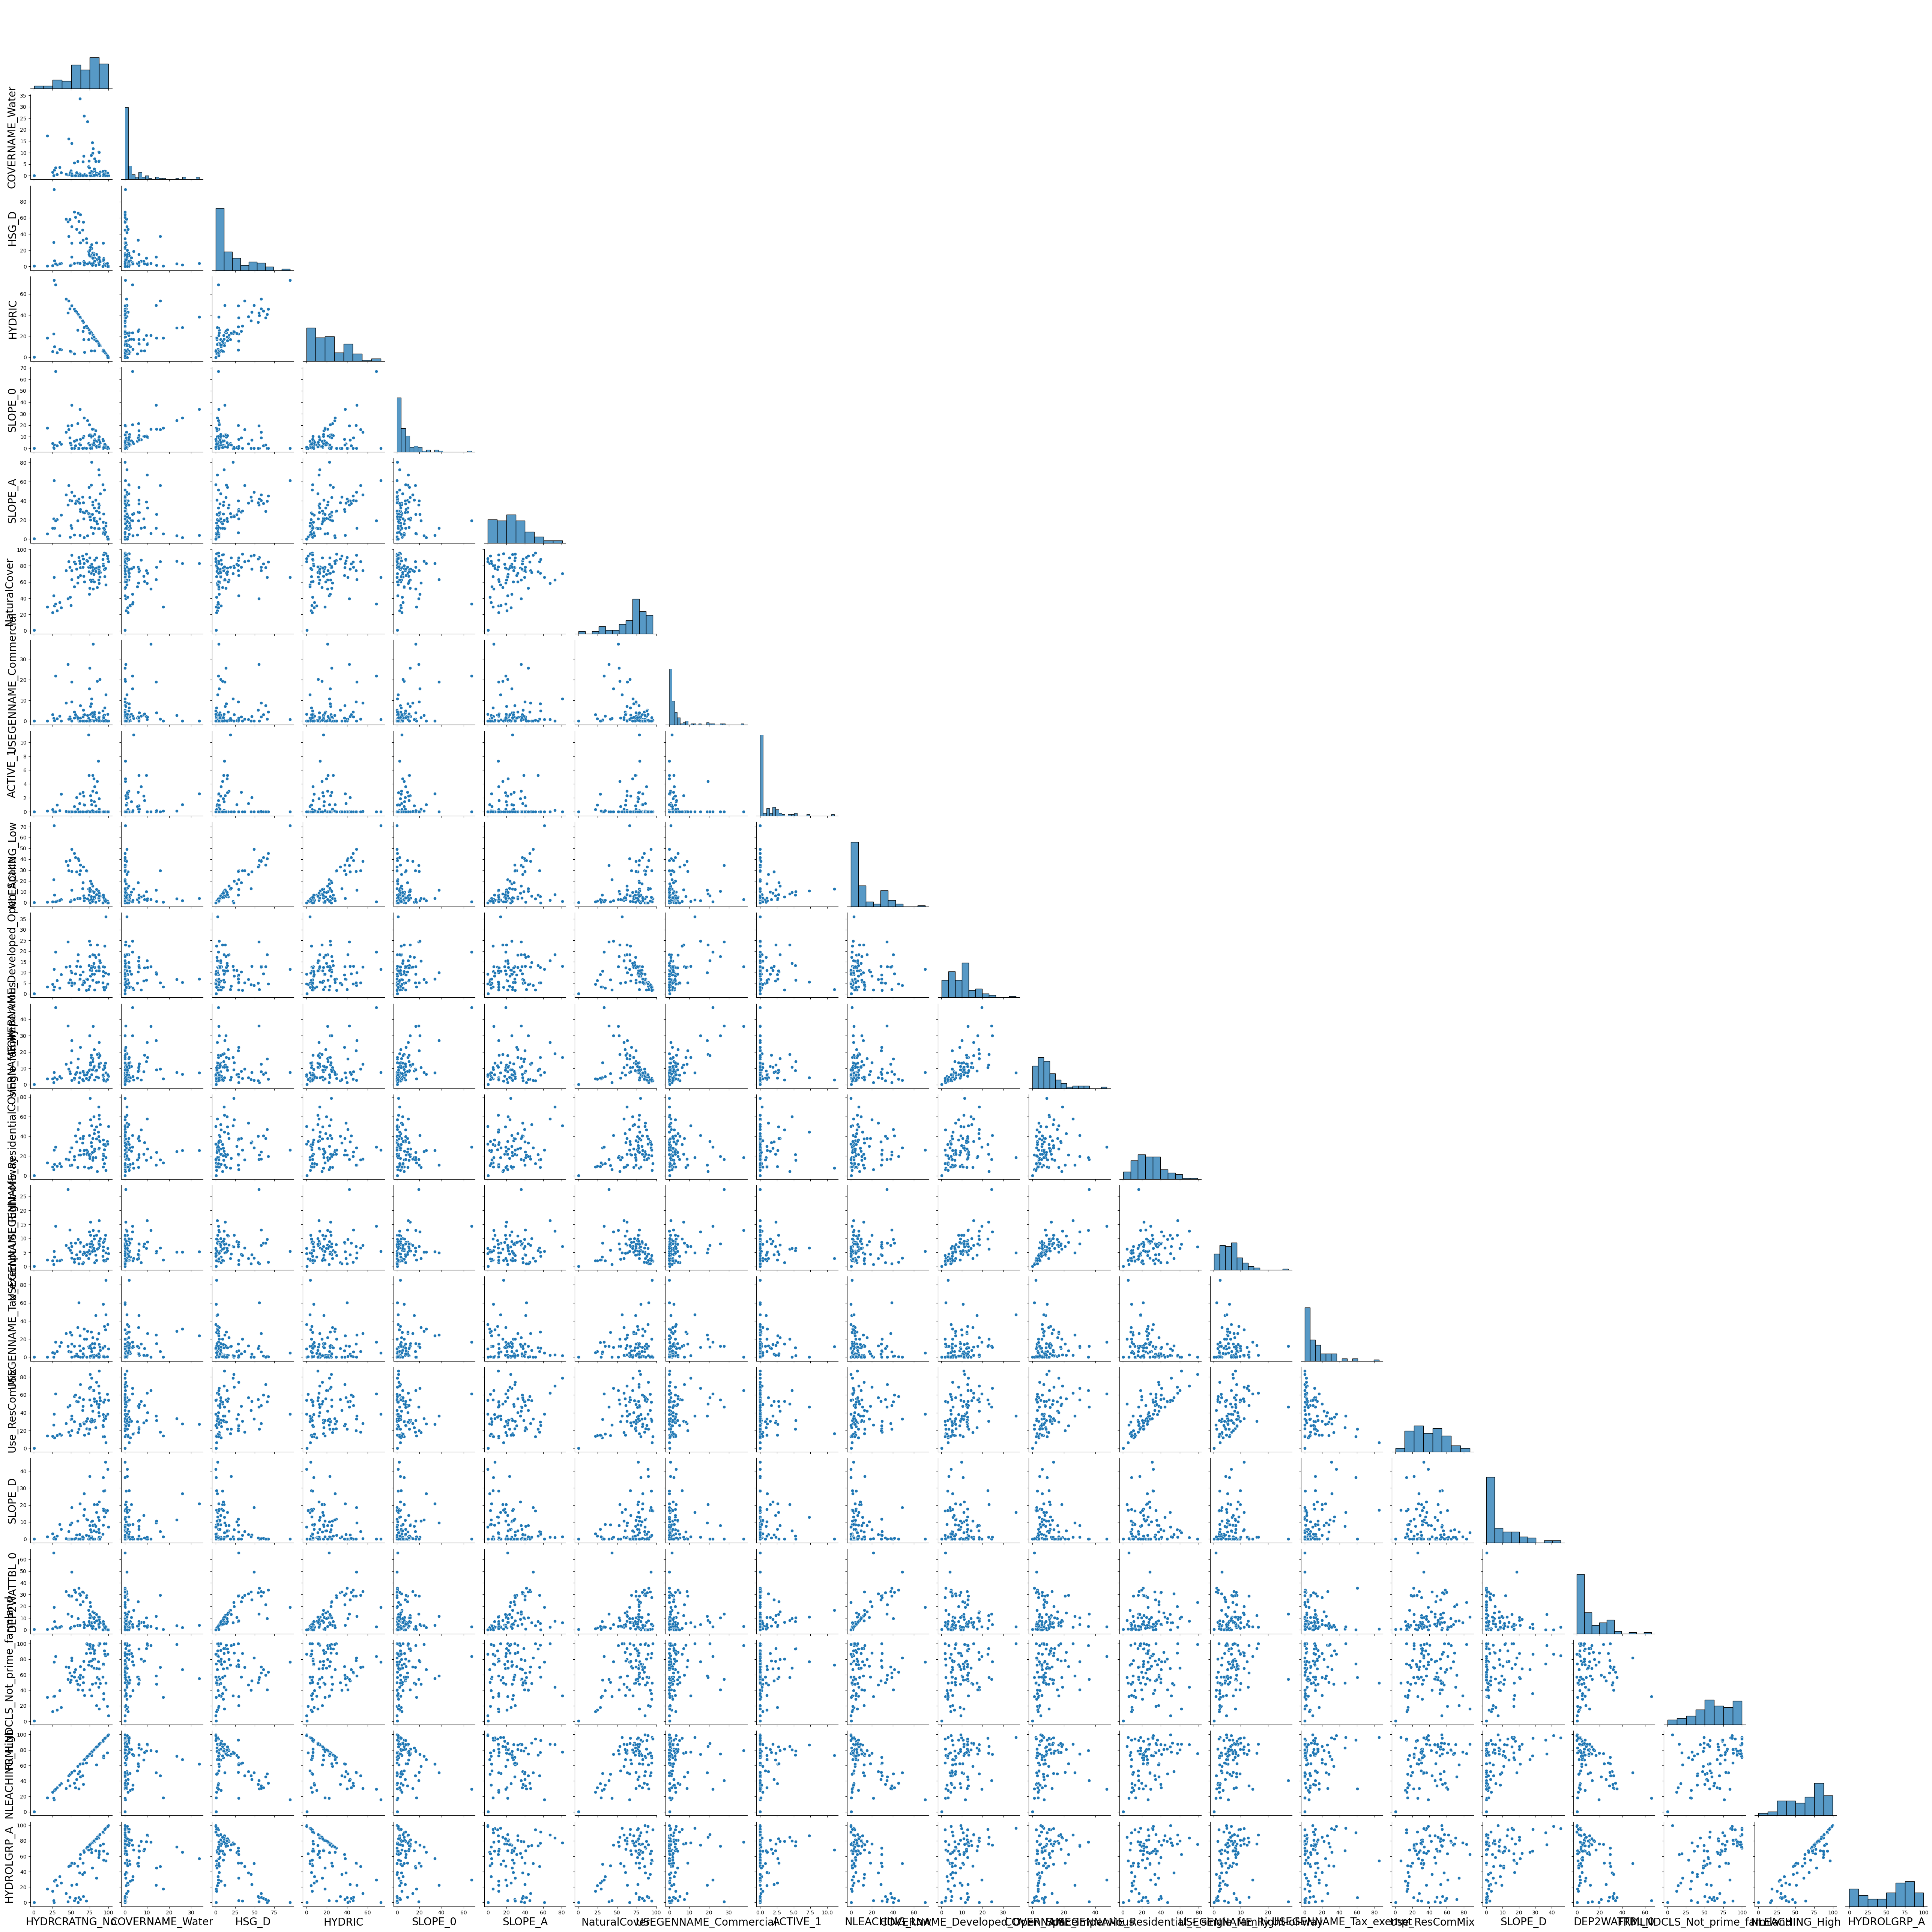

In [164]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df[selected_watershed_features],corner=True) # show only lower triangle

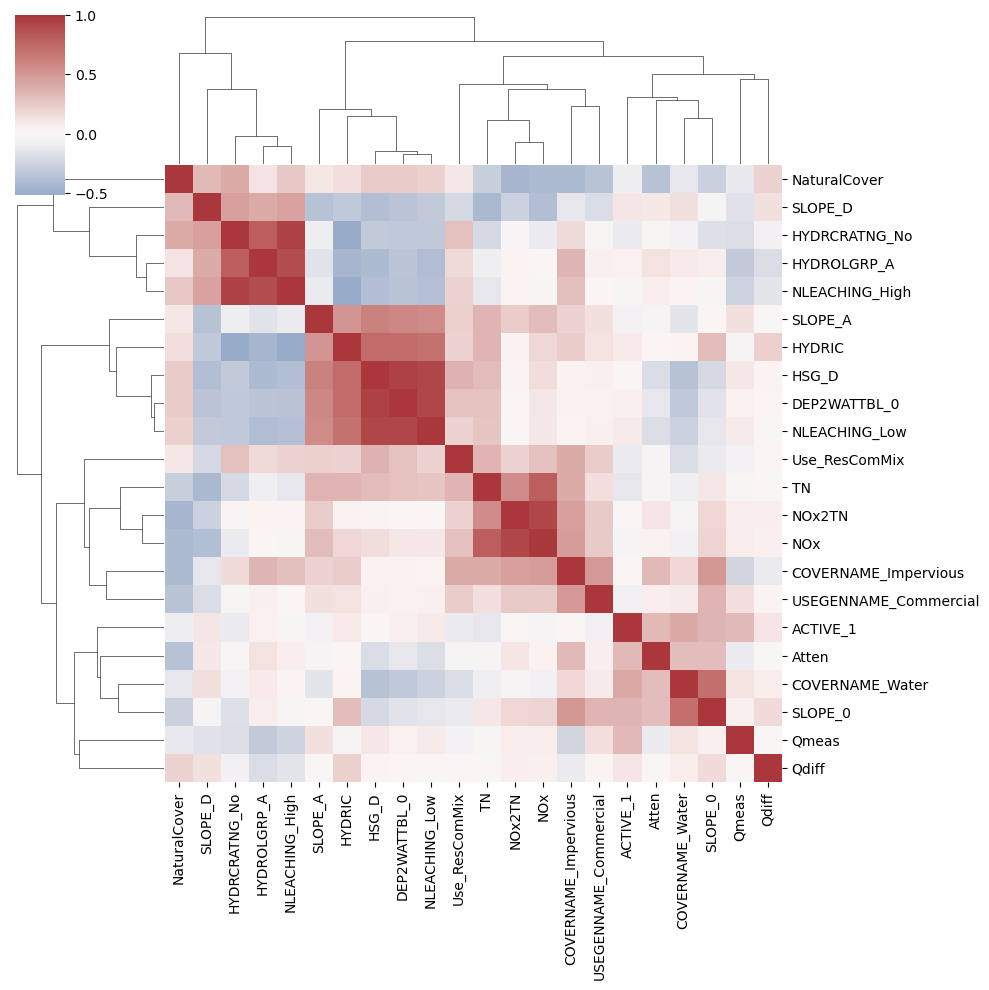

In [13]:
sns.clustermap(df[selected_monitoring_cols+selected_watershed_features].corr('spearman'),cmap="vlag", center=0)

## MODELING

In [165]:
# modeling
# Importing libraries for building linear regression model
#import statsmodels
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [176]:
# select Y
y_name = 'NOx'
_ = df
#_ = df[df['Atten']>-50] # remove outlier attenuation
_ = _[_[y_name].notna()]
#train_target = np.log(_[y_name])
train_target = _[y_name]
# select Xs
#selected_features = selected
selected_features = selected_le5 + selected_gt5
#selected_cols = selected_cols
train_features_selected = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)][selected_features]
train_features_extended = _.loc[:, ~_.columns.isin(df_monitoring_avg.columns)]._get_numeric_data()
#train_features = np.log(train_features_selected + 1)
train_features = train_features_selected

In [177]:
# scale the X data
scaler = StandardScaler()
# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)
# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)
train_features_scaled.head()

,LE5_HYDRCRATNG_No,LE5_COVERNAME_Water,LE5_HSG_D,LE5_HYDRIC,LE5_SLOPE_0,LE5_SLOPE_A,LE5_NaturalCover,LE5_USEGENNAME_Commercial,LE5_ACTIVE_1,LE5_NLEACHING_Low,...,GT5_COVERNAME_Impervious,GT5_USEGENNAME_Residential_-_single_family,GT5_USEGENNAME_Right-of-way,GT5_USEGENNAME_Tax_exempt,GT5_Use_ResComMix,GT5_SLOPE_D,GT5_DEP2WATTBL_0,GT5_FRMLNDCLS_Not_prime_farmland,GT5_NLEACHING_High,GT5_HYDROLGRP_A
0,-0.446114,-0.317393,0.416326,0.837838,0.247745,0.455768,0.43227,-0.284915,0.060849,0.151806,...,-0.384789,0.388705,-0.567366,-0.633206,0.674939,-0.571949,1.304934,-0.423929,-1.0413,-1.094499
1,-0.446114,-0.317393,0.416326,0.837838,0.247745,0.455768,0.43227,-0.284915,0.060849,0.151806,...,-0.384789,0.388705,-0.567366,-0.633206,0.674939,-0.571949,1.304934,-0.423929,-1.0413,-1.094499
2,-0.446114,-0.317393,0.416326,0.837838,0.247745,0.455768,0.43227,-0.284915,0.060849,0.151806,...,-0.384789,0.388705,-0.567366,-0.633206,0.674939,-0.571949,1.304934,-0.423929,-1.0413,-1.094499
3,-0.446114,-0.317393,0.416326,0.837838,0.247745,0.455768,0.43227,-0.284915,0.060849,0.151806,...,-0.384789,0.388705,-0.567366,-0.633206,0.674939,-0.571949,1.304934,-0.423929,-1.0413,-1.094499
4,-0.446114,-0.317393,0.416326,0.837838,0.247745,0.455768,0.43227,-0.284915,0.060849,0.151806,...,-0.384789,0.388705,-0.567366,-0.633206,0.674939,-0.571949,1.304934,-0.423929,-1.0413,-1.094499


In [178]:
from sklearn.model_selection import train_test_split 
y = train_target
X = train_features_scaled
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=30)

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
y = train_target
X = train_features_scaled
rg = Ridge(alpha=0.03)
ls = Lasso(alpha=0.02)
en = ElasticNet(alpha=0.03,l1_ratio=0.7)
lr = LinearRegression()

In [170]:
rg.fit(X_train, y_train)
ls.fit(X_train, y_train)
lr.fit(X_train, y_train)
en.fit(X_train, y_train)

ElasticNet(alpha=0.03, l1_ratio=0.7)

In [180]:
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.linear_model import LassoCV

# Use L1 penalty
estimator = LassoCV(cv=10, normalize = True)

n_feats = int(np.floor(X.shape[0]/10))
if n_feats > X.shape[1]: 
    n_feats=X.shape[1]
# Set a minimum threshold of 0.25
m = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=n_feats)
m.fit(X, y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)
# get variance inflation factor
vif = fn_get_vif(feature_name,X)
print(vif)

Index(['LE5_USEGENNAME_Commercial', 'LE5_ACTIVE_1', 'LE5_NLEACHING_Low',
       'LE5_FRMLNDCLS_Not_prime_farmland', 'GT5_SLOPE_A', 'GT5_NaturalCover',
       'GT5_COVERNAME_Developed_Open_Space',
       'GT5_USEGENNAME_Residential_-_single_family', 'GT5_SLOPE_D'],
      dtype='object')


PatsyError: Error evaluating factor: NameError: name 'GT5_USEGENNAME_Residential_' is not defined
    LE5_USEGENNAME_Commercial ~ LE5_ACTIVE_1 + LE5_NLEACHING_Low + LE5_FRMLNDCLS_Not_prime_farmland + GT5_SLOPE_A + GT5_NaturalCover + GT5_COVERNAME_Developed_Open_Space + GT5_USEGENNAME_Residential_-_single_family + GT5_SLOPE_D
                                                                                                                                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [173]:
#import cvoxpt
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='Lasso')

display(ols_res_0.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOx   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     13.59
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           7.14e-10
Time:                        12:58:43   Log-Likelihood:                -112.81
No. Observations:                  96   AIC:                             237.6
Df Residuals:                      90   BIC:                             253.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2668      0.083    -15.337      0.000      -1.431      -1.103
LE5_USEGENNAME_Commercial              0.1169      0.084      1.384      0.170      -0.051       0.285
LE5_ACTIVE_1                          -0.1622      0.083     -1.956      0.054      -0.327       0.003
GT5_NaturalCover                      -0.2564      0.091     -2.815      0.006      -0.437      -0.075
GT5_COVERNAME_Developed_Open_Space     0.5640      0.087      6.458      0.000       0.391       0.738
GT5_SLOPE_D                           -0.2557      0.088     -2.899      0.005      -0.431      -0.080
==============================================================================
Omnibus:                       20.062   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.282
Skew:                          -0.858   Prob(JB):                     3.60e-08
Kurtosis:                       5.371   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

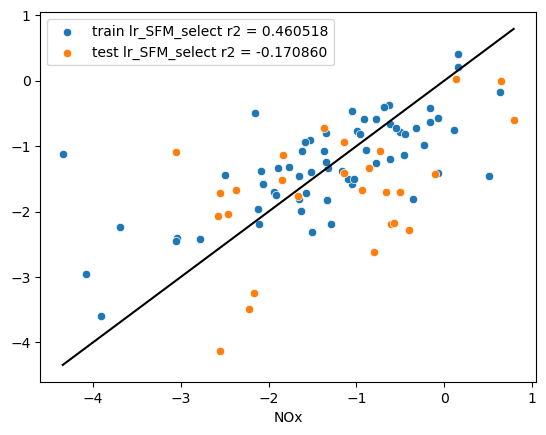

In [174]:
ls_select = lr.fit(X_train[feature_name],y_train)

fn_plot_obs_vs_pred(ls_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_SFM_select')

Index(['LE5_USEGENNAME_Commercial', 'LE5_ACTIVE_1', 'LE5_DEP2WATTBL_0',
       'GT5_NaturalCover', 'GT5_COVERNAME_Developed_Open_Space',
       'GT5_USEGENNAME_Residential_-_single_family',
       'GT5_USEGENNAME_Tax_exempt', 'GT5_Use_ResComMix', 'GT5_SLOPE_D'],
      dtype='object')


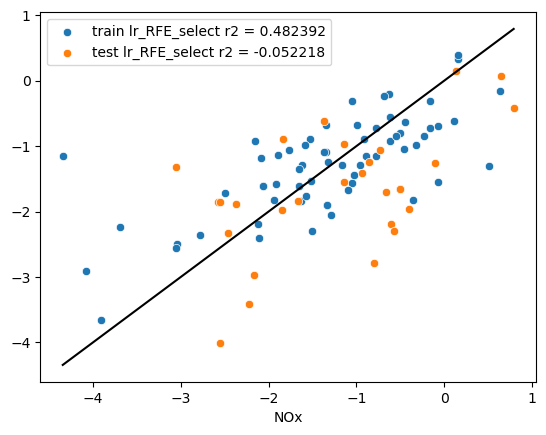

In [175]:
# recursive feature elimination
# THIS TAKES A LONG TIME TO RUN
m = RFE(estimator,n_features_to_select=n_feats)
m.fit(X,y)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)

lr_select = lr.fit(X_train[feature_name],y_train)

fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_RFE_select')

Index(['LE5_HSG_D', 'LE5_ACTIVE_1', 'GT5_COVERNAME_Impervious', 'GT5_SLOPE_D',
       'GT5_SLOPE_A', 'GT5_NaturalCover'],
      dtype='object')
running cross validation with ShuffleSplit: n_splits=19, test_size=0.3, rand_state = 0
0.25 accuracy with a standard deviation of 0.16


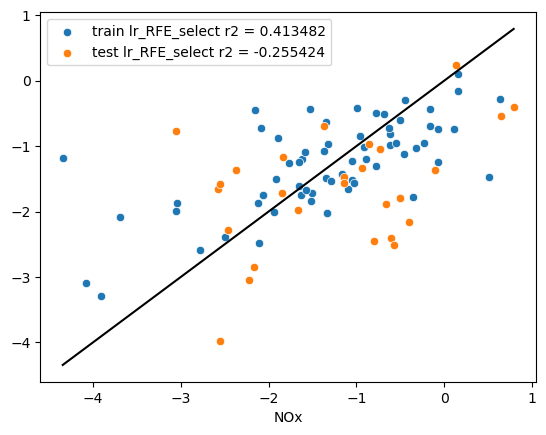

In [158]:
# forward feature selection
from sklearn.feature_selection import SequentialFeatureSelector
SequentialFeatureSelector(estimator, n_features_to_select=n_feats)
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
print(feature_name)

lr_select = lr.fit(X_train[feature_name],y_train)
fn_sklearn_cross_val_scores(lr_select,X[feature_name],y)

fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'lr_RFE_select')

In [147]:
# Adding the intercept term
train_features_scaled_select = sm.add_constant(train_features_scaled[feature_name])
train_features_scaled.columns
from functions import *

# get variance inflation factor
vif = fn_get_vif(feature_name,train_features_scaled_select)
print(vif)
# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled_select)

# Fitting the Model
ols_res_0 = ols_model_0.fit()
#ols_res_0 = ols_model_0.fit_regularized(method='sqrt_lasso')

display(ols_res_0.summary())

VIF is not of concern if less than 3
                               VIF  Tolerance
LE5_HSG_D                 1.436603   0.696086
LE5_ACTIVE_1              1.051986   0.950583
GT5_COVERNAME_Impervious  1.139827   0.877326
GT5_SLOPE_D               1.460327   0.684778
GT5_SLOPE_A               1.753857   0.570172
GT5_NaturalCover          1.564218   0.639297


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOx   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.101
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           5.42e-07
Time:                        11:52:35   Log-Likelihood:                -118.88
No. Observations:                  96   AIC:                             251.8
Df Residuals:                      89   BIC:                             269.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2668      0.088    -14.316      0.000      -1.443      -1.091
LE5_HSG_D                    0.1954      0.106      1.842      0.069      -0.015       0.406
LE5_ACTIVE_1                -0.1964      0.091     -2.164      0.033      -0.377      -0.016
GT5_COVERNAME_Impervious     0.3712      0.094      3.930      0.000       0.184       0.559
GT5_SLOPE_D                 -0.1347      0.107     -1.260      0.211      -0.347       0.078
GT5_SLOPE_A                  0.1633      0.117      1.394      0.167      -0.070       0.396
GT5_NaturalCover            -0.3360      0.111     -3.036      0.003      -0.556      -0.116
==============================================================================
Omnibus:                       17.404   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.264
Skew:                          -0.904   Prob(JB):                     1.46e-05
Kurtosis:                       4.516   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# CROSS VALIDATATION FOR MODEL HYPERPARAMETER TUNING

In [237]:
from sklearn.linear_model import LassoCV
import time
from sklearn.pipeline import make_pipeline
start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

0.020836135083688583


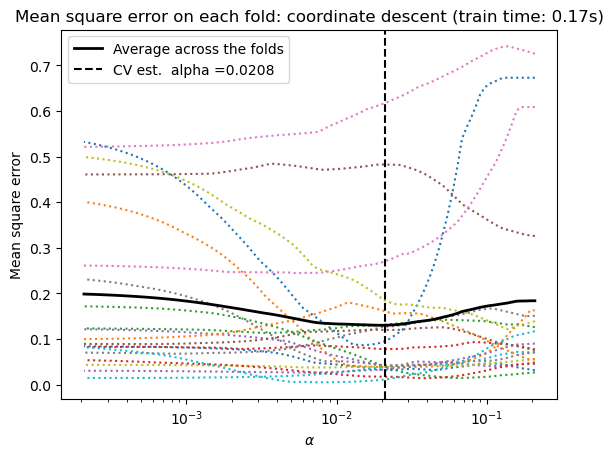

In [238]:
import matplotlib.pyplot as plt

lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="CV est.  alpha ="+str(round(lasso.alpha_,4)))
print(lasso.alpha_)
#plt.ylim()
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

In [27]:
# fit the model with alpha
ls = Lasso(alpha=lasso.alpha_)
ls.fit(X_train[feature_name],y_train)
fn_plot_obs_vs_pred(ls,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls')

NameError: name 'lasso' is not defined

running cross validation with ShuffleSplit: n_splits=19, test_size=0.3, rand_state = 0
0.23 accuracy with a standard deviation of 0.17


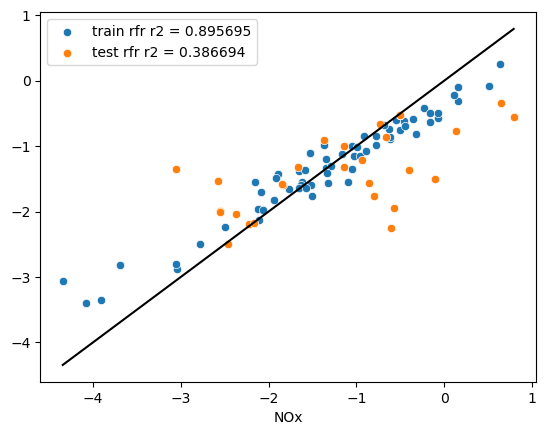

In [151]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
fn_sklearn_cross_val_scores(rfr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr,X_test,X_train,y_test,y_train,'rfr')

In [152]:

'''
# use this line to install shap if needed
!pip install shap
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/heatmap.html
'''

import shap
# Fits the explainer
explainer = shap.Explainer(rfr, X)
# Calculates the SHAP values - It takes some time

In [153]:
#shap_values = explainer(X_train)
shap_values = explainer(X_train)

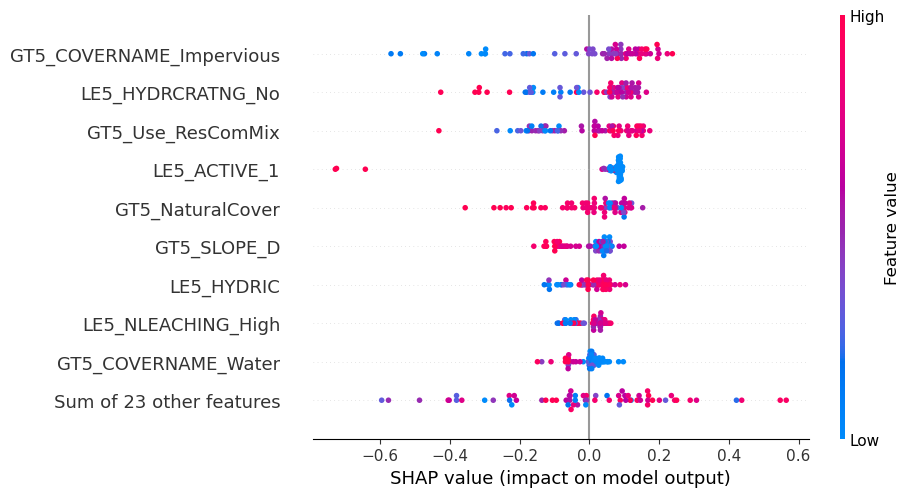

In [154]:
shap.plots.beeswarm(shap_values)

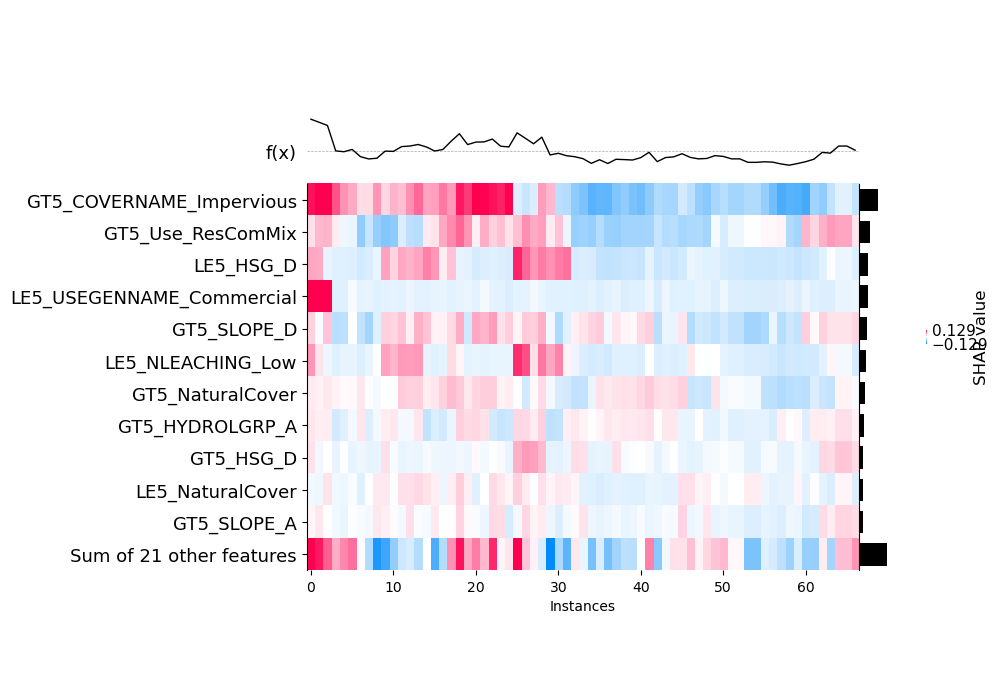

In [38]:
shap.plots.heatmap(shap_values,max_display=12)

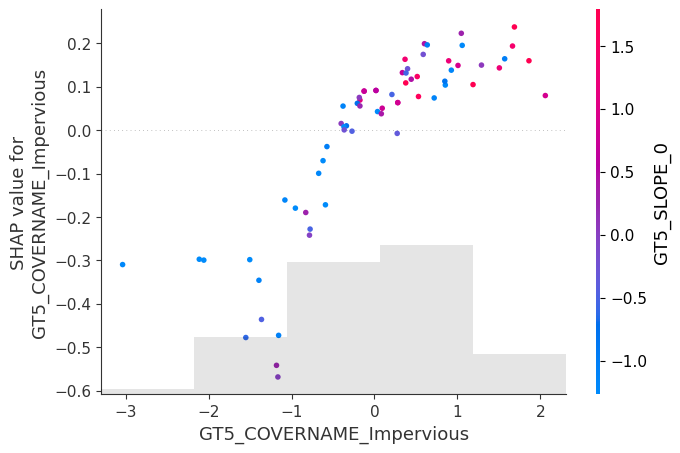

In [155]:
shap.plots.scatter(shap_values[:,"GT5_COVERNAME_Impervious"], color=shap_values)

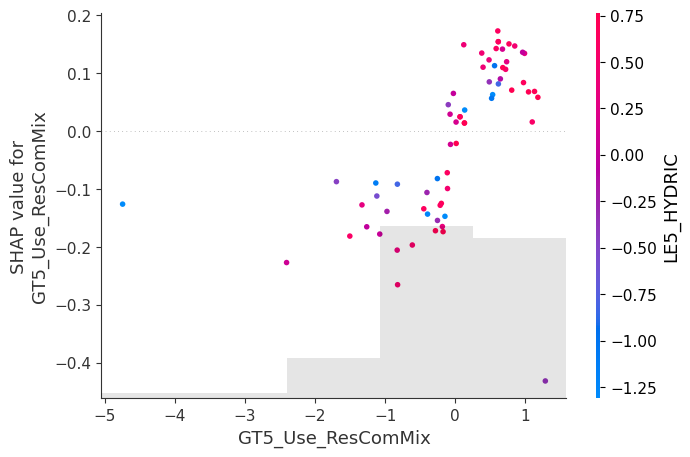

In [156]:
shap.plots.scatter(shap_values[:,"GT5_Use_ResComMix"],color=shap_values)

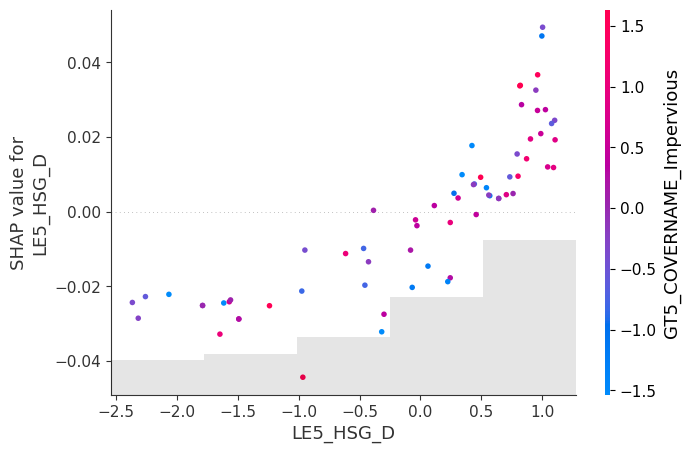

In [157]:
shap.plots.scatter(shap_values[:,"LE5_HSG_D"], color=shap_values)

In [26]:
def fn_sklearn_cross_val_scores(estimator,X,y,cv = None,test_frac=0.3,rnd=0,scoring='r2'):
    '''returns cross validation scores on a dataset given an `estimator`, training features (x), and target features (y)'''
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import ShuffleSplit
    import pandas as pd
    import numpy as np
    if cv is None:
        n_samples = X.shape[0]
        n_cv = int(np.floor(n_samples/5))
        print('running cross validation with ShuffleSplit: n_splits=%s, test_size=%s, rand_state = %s' %(n_cv,test_frac,rnd))
        cv = ShuffleSplit(n_splits=n_cv, test_size=test_frac, random_state=rnd)
    scores = cross_val_score(estimator, X, y, cv=cv,scoring='r2')
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    return scores

In [27]:
fn_sklearn_cross_val_scores(lr,X,y)

running cross validation with ShuffleSplit: n_splits=19, test_size=0.3, rand_state = 0
-0.40 accuracy with a standard deviation of 0.70


array([-0.06735486, -0.08486383, -0.10010073,  0.22609255, -0.50397451,
        0.2526354 , -0.66357696, -1.06282209, -0.25484184,  0.21694249,
        0.02997143, -1.27089427,  0.06196477,  0.14365615, -0.43452647,
       -0.1416191 , -0.95774598, -2.70655073, -0.23312817])

In [1]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rfr, X, y, cv=10,
                        scoring=('r2'),
                        return_train_score=True)
print(scores)

NameError: name 'rfr' is not defined

In [98]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,3,10]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 8, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nRandom Search Grid:\n")
pprint(random_grid)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Random Search Grid:

{'bootstrap': [True, False],
 'max_depth': [1, 3, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 6],
 'min_samples_split': [4, 8, 16],
 'n_estimators': [2, 46, 90, 134, 178, 223, 267, 311, 355, 400]}


In [99]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [113]:
# Fit the random search model
rfr_random.fit(X_train[feature_name], y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=3,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 6],
                                        'min_samples_split': [4, 8, 16],
                                        'n_estimators': [2, 46, 90, 134, 178,
                                                         223, 267, 311, 355,
                                                         400]},
                   random_state=42, verbose=2)

{'n_estimators': 355, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 1, 'bootstrap': False}
running cross validation with ShuffleSplit: n_splits=19, test_size=0.3, rand_state = 0
0.12 accuracy with a standard deviation of 0.32


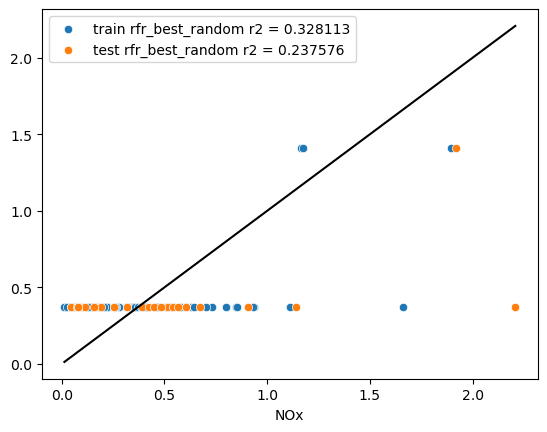

In [115]:
# Fit the random search model
print(rfr_random.best_params_)

# save the best random trianed model
rfr_best_random = rfr_random.best_estimator_
fn_sklearn_cross_val_scores(rfr_best_random,X[feature_name],y)
# plot obs vs fitted
fn_plot_obs_vs_pred(rfr_best_random,X_test[feature_name],X_train[feature_name],y_test,y_train,'rfr_best_random')

In [117]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,6,12],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [8,10,12],
    'n_estimators': [i for i in range(200,240)]}
# Instantiate the grid search model
rfr_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
rfr_grid.fit(X_train[feature_name], y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=2,
                                             min_samples_split=5,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 6, 12],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 201, 202, 203, 204, 205, 206,
                                          207, 208, 209, 210, 211, 212, 213,
                                          214, 215, 216, 217, 218, 219, 220,
                                          221, 222, 223, 224, 225, 226, 227,
                                          228, 229, ...]},
             verbose=2)

{'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 233}
running cross validation with ShuffleSplit: n_splits=19, test_size=0.3, rand_state = 0
0.20 accuracy with a standard deviation of 0.09


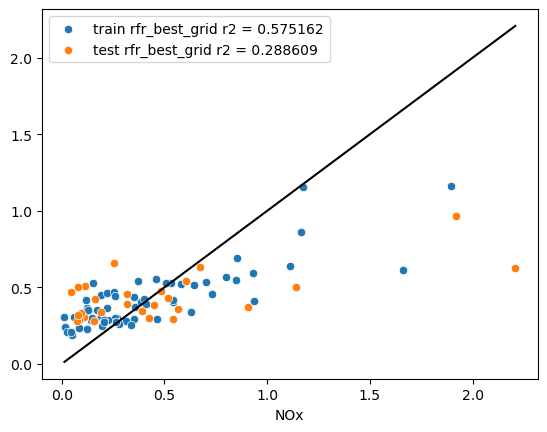

In [118]:
# Fit the random search model
print(rfr_grid.best_params_)

# pull out best estimator
rfr_best_grid = rfr_grid.best_estimator_
fn_sklearn_cross_val_scores(rfr_best_grid,X[feature_name],y)

# plot obs vs fitted
fn_plot_obs_vs_pred(rfr_best_grid,X_test[feature_name],X_train[feature_name],y_test,y_train,'rfr_best_grid')

Elapsed time to compute the importances: 0.005 seconds


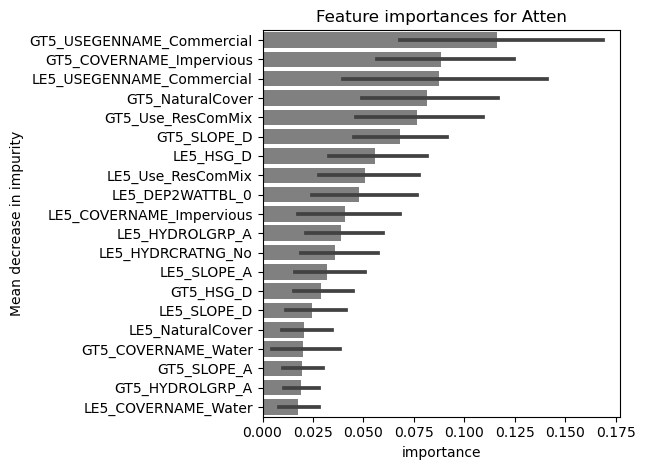

In [181]:
df_importance = fn_ensemble_feature_importance_plot(rfr_best_grid,X.columns,y_name='Atten')

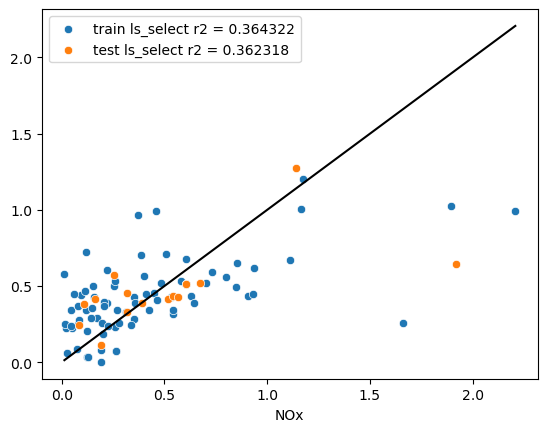

In [34]:
feature_name = df_importance.varname[:6]
ls_select = estimator.fit(X_train[feature_name],y_train)

fn_plot_obs_vs_pred(ls_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls_select')

running cross validation with ShuffleSplit: n_splits=19, test_size=0.3, rand_state = 0
0.05 accuracy with a standard deviation of 0.31


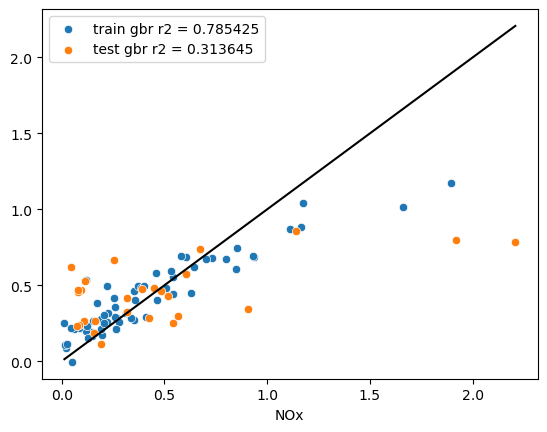

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
# define model and select hyperparameters
gbr = GradientBoostingRegressor(min_samples_split=10,min_samples_leaf=10,max_depth=2,learning_rate=0.05,random_state=1)

# fit model to training data
gbr.fit(X_train,y_train)
fn_sklearn_cross_val_scores(gbr,X,y)
# plot obs vs fitted
fn_plot_obs_vs_pred(gbr,X_test,X_train,y_test,y_train,'gbr')

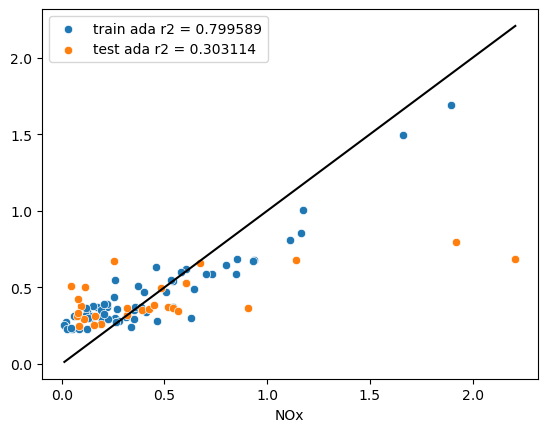

In [48]:
## DECISION TREE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor()

ada = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=2), n_estimators=1000, random_state=rng
)
ada.fit(X_train,y_train)
fn_plot_obs_vs_pred(ada,X_test,X_train,y_test,y_train,'ada')

In [184]:
fn_sklearn_cross_val_scores(ada,X,y)

running cross validation with ShuffleSplit: n_splits=19, test_size=0.2, rand_state = 0
0.02 accuracy with a standard deviation of 0.35


array([ 0.24726304,  0.14547465, -0.38675824,  0.15794317,  0.0483966 ,
        0.29804628,  0.12959949,  0.31078073,  0.23282562,  0.16594977,
        0.13278998,  0.02505976,  0.3259636 , -0.24398463,  0.26103226,
        0.1131308 , -1.07633332, -0.57753233,  0.04552811])

Elapsed time to compute the importances: 0.020 seconds


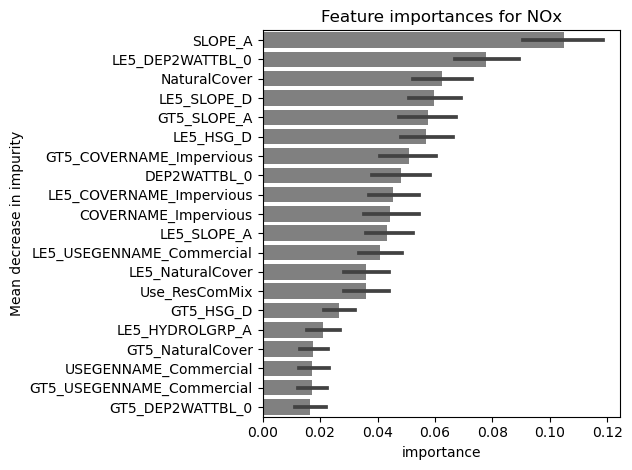

In [38]:
df_importance = fn_ensemble_feature_importance_plot(ada,X.columns,y_name)

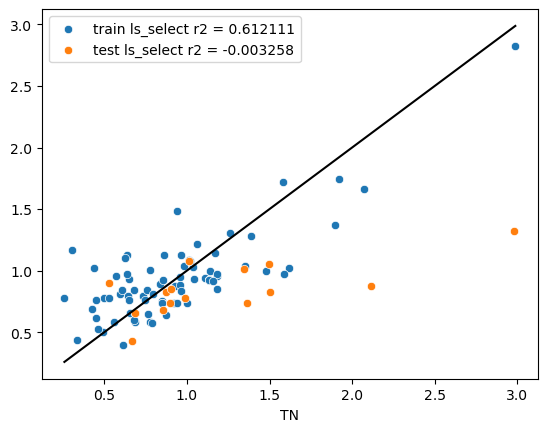

In [185]:
feature_name = df_importance.varname[:10]
lr_select = lr.fit(X_train[feature_name],y_train)

fn_plot_obs_vs_pred(lr_select,X_test[feature_name],X_train[feature_name],y_test,y_train,'ls_select')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

# LinearRegression on PCA
pcr = make_pipeline(StandardScaler(), PCA(n_components=n_feats), ls)
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

# Partial Least Squares
pls = PLSRegression(n_components=n_feats)
pls.fit(X_train[selected_features], y_train)


PLSRegression(n_components=6)

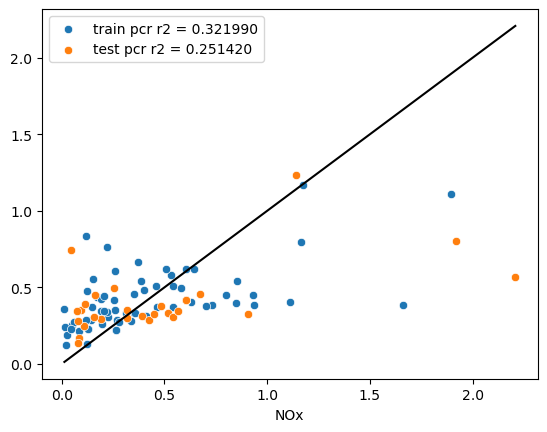

In [66]:
fn_plot_obs_vs_pred(pcr,X_test,X_train,y_test,y_train,'pcr')

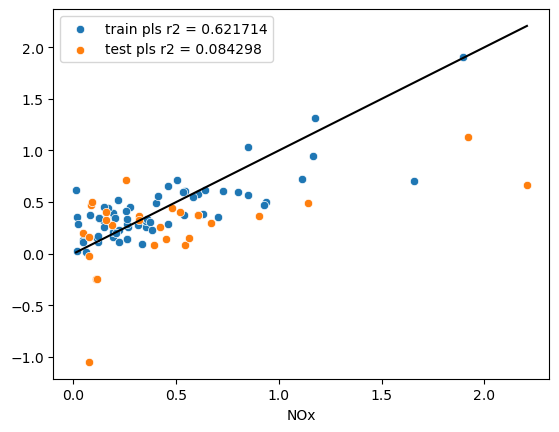

In [68]:
fn_plot_obs_vs_pred(pls,X_test[selected_features],X_train[selected_features],y_test,y_train,'pls')

# Appendix

## Unused code snippets

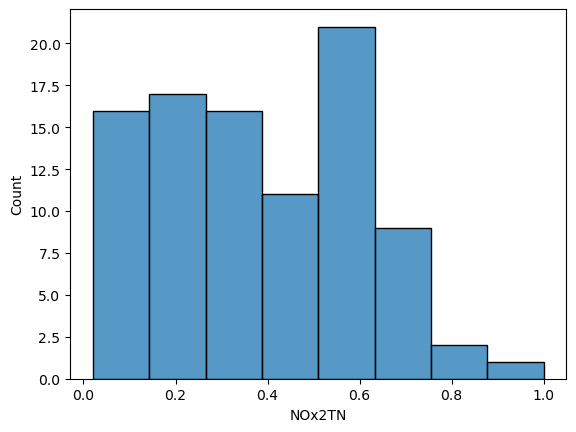

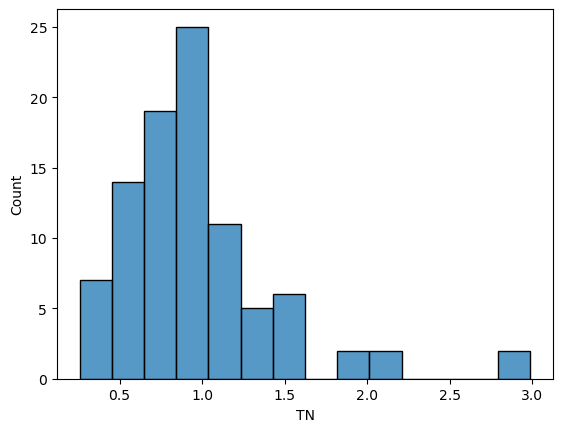

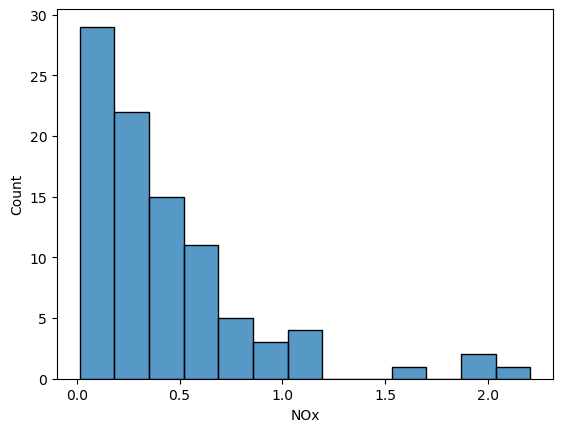

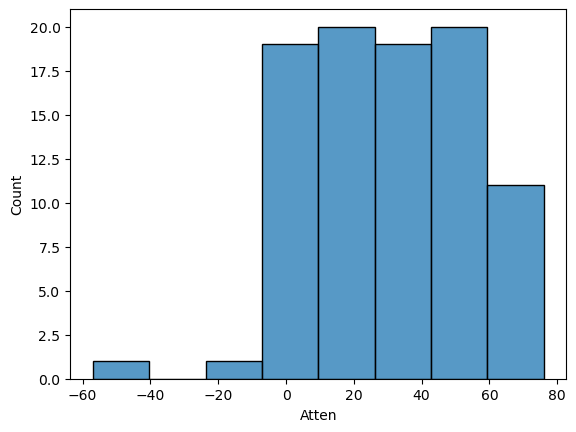

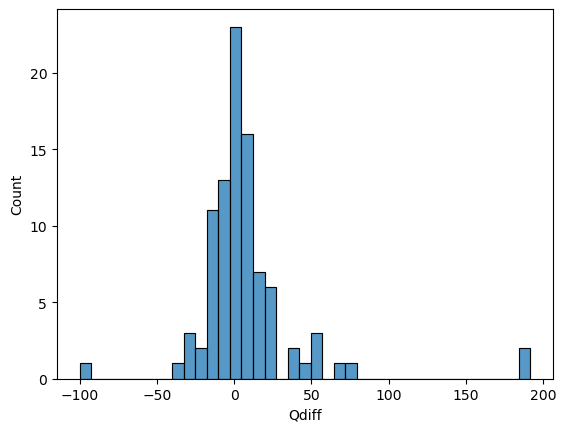

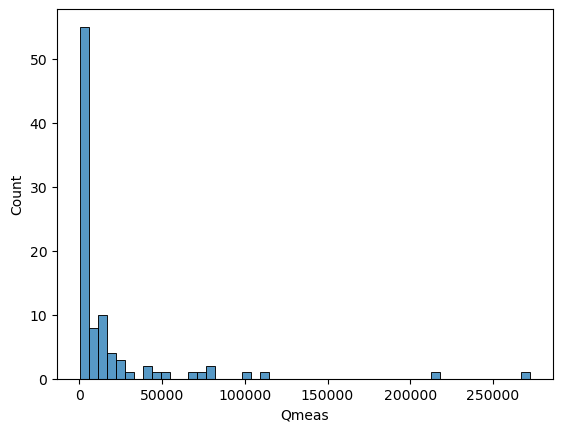

In [61]:
# Creating histograms
vars = ["NOx2TN","TN","NOx",'Atten','Qdiff','Qmeas']
#var = vars[0]
#fig, axes = plt.subplots(2, 3, figsize = (20, 6))
for var in vars:
    sns.histplot(x=var,data=df_monitoring_avg)
    plt.show()

<AxesSubplot:xlabel='Use_ResComMix', ylabel='NO3 (mg/L)'>

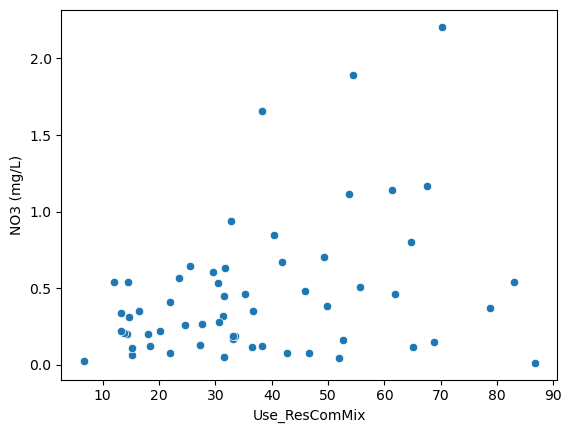

In [645]:
sns.scatterplot(x='Use_ResComMix',y='NO3 (mg/L)',data=df)

In [ ]:
y_pred_lr = lr.predict(X_train)
y_pred_ls = ls.predict(X_train)
y_pred_rg = rg.predict(X_train)
y_pred_en = en.predict(X_train)
r2_score_lr = r2_score(y_train, y_pred_lr)
print("ols r^2 on training data : %f" % r2_score_lr)
sns.scatterplot(x=y_train,y=y_pred_lr,alpha=0.5)
plt.plot([0,y.max()], [0,y.max()], color='r')

r2_score_ls = r2_score(y_train, y_pred_ls)
print("lasso r^2 on training data : %f" % r2_score_ls)
sns.scatterplot(x=y_train,y=y_pred_ls,alpha=0.5)

r2_score_rg = r2_score(y_train, y_pred_rg)
print("ridge r^2 on training data : %f" % r2_score_rg)
sns.scatterplot(x=y_train,y=y_pred_rg,alpha=0.5)

r2_score_en = r2_score(y_train, y_pred_en)
print("elastic r^2 on training data : %f" % r2_score_en)
sns.scatterplot(x=y_train,y=y_pred_en,alpha=0.5)

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_ls = ls.predict(X_test)
y_pred_rg = rg.predict(X_test)
y_pred_en = en.predict(X_test)
r2_score_lr = r2_score(y_test, y_pred_lr)
#print("ols r^2 on testing data : %f" % r2_score_lr)
#sns.scatterplot(x=y_test,y=y_pred_lr)
plt.plot([0,y.max()], [0,y.max()], color='black')
r2_score_ls = r2_score(y_test, y_pred_ls)
print("lasso r^2 on testing data : %f" % r2_score_ls)
sns.scatterplot(x=y_test,y=y_pred_ls)

r2_score_rg = r2_score(y_test, y_pred_rg)
print("ridge r^2 on testing data : %f" % r2_score_rg)
sns.scatterplot(x=y_test,y=y_pred_rg)

r2_score_en = r2_score(y_test, y_pred_en)
print("elastic r^2 on testing data : %f" % r2_score_en)
sns.scatterplot(x=y_test,y=y_pred_en)

In [575]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)
fit_time = time.time() - start_time

ValueError: You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.

In [253]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [254]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

In [161]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]

results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
0.031542,114.334525,114.334525
0.023974,114.010196,116.153331
0.021954,115.255085,119.541355
0.012421,113.799677,120.229081
0.011184,115.371439,123.943978
0.010357,117.031645,127.747319
0.008955,118.216894,131.075702
0.007372,119.356436,134.358379
0.006628,120.976046,138.121124


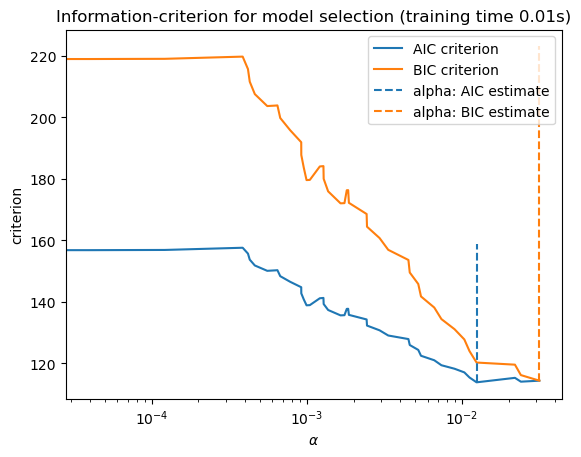

In [162]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)